# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [11]:
# Create city data frames
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [47]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.set_index("city").groupby("type").count()["ride_id"]
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [34]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.set_index("city").groupby("type").sum()["driver_count"]
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [38]:
#  3. Get the total amount of fares for urban city type
total_fare = pyber_data_df.set_index("city").groupby("type").sum()["fare"]
total_fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [39]:
#  4. Get the average fare per ride for each city type. 
avg_fare = pyber_data_df.set_index("city").groupby("type").mean()["fare"]
avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [50]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fare / total_drivers
avg_fare_driver.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [59]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame()
pyber_summary_df["Total Rides"] = total_rides
pyber_summary_df["Total Drivers"] = total_drivers
pyber_summary_df["Total Fare"] = total_fare
pyber_summary_df["Average Fare"] = avg_fare
pyber_summary_df["Avg fare per driver"] = avg_fare_driver

pyber_summary_df

,Total Rides,Total Drivers,Total Fare,Average Fare,Avg fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [60]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [70]:
#  8. Format the columns.
pyber_summary_df.style.format({"Total Rides":"{:,d}",
                              "Total Drivers":"{:,d}",
                             "Total Fare":'${0:,.2f}',
                              "Average Fare":'${0:,.2f}',
                              "Avg fare per driver":'${0:,.2f}'})

,Total Rides,Total Drivers,Total Fare,Average Fare,Avg fare per driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [71]:
# Print the merged DataFrame for reference.
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [76]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
sum_of_fares_df.head()

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26

In [78]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
sum_of_fares_df = sum_of_fares_df.reset_index()
sum_of_fares_df

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [82]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_pivot = sum_of_fares_df.pivot(index="date",columns = "type", values = 'fare')
fares_pivot.head()

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31


In [89]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
new_pyber_df = fares_pivot.loc['2019-01-01':'2019-04-28']
new_pyber_df = pd.DataFrame()
new_pyber_df = fares_pivot
new_pyber_df

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [90]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
new_pyber_df.index = pd.to_datetime(new_pyber_df.index)
new_pyber_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [92]:
# 6. Check that the datatype for the index is datetime using df.info()
new_pyber_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [94]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_weeks = new_pyber_df.resample('w').sum()
pyber_weeks_df = pd.DataFrame()
pyber_weeks_df = pyber_weeks
pyber_weeks_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


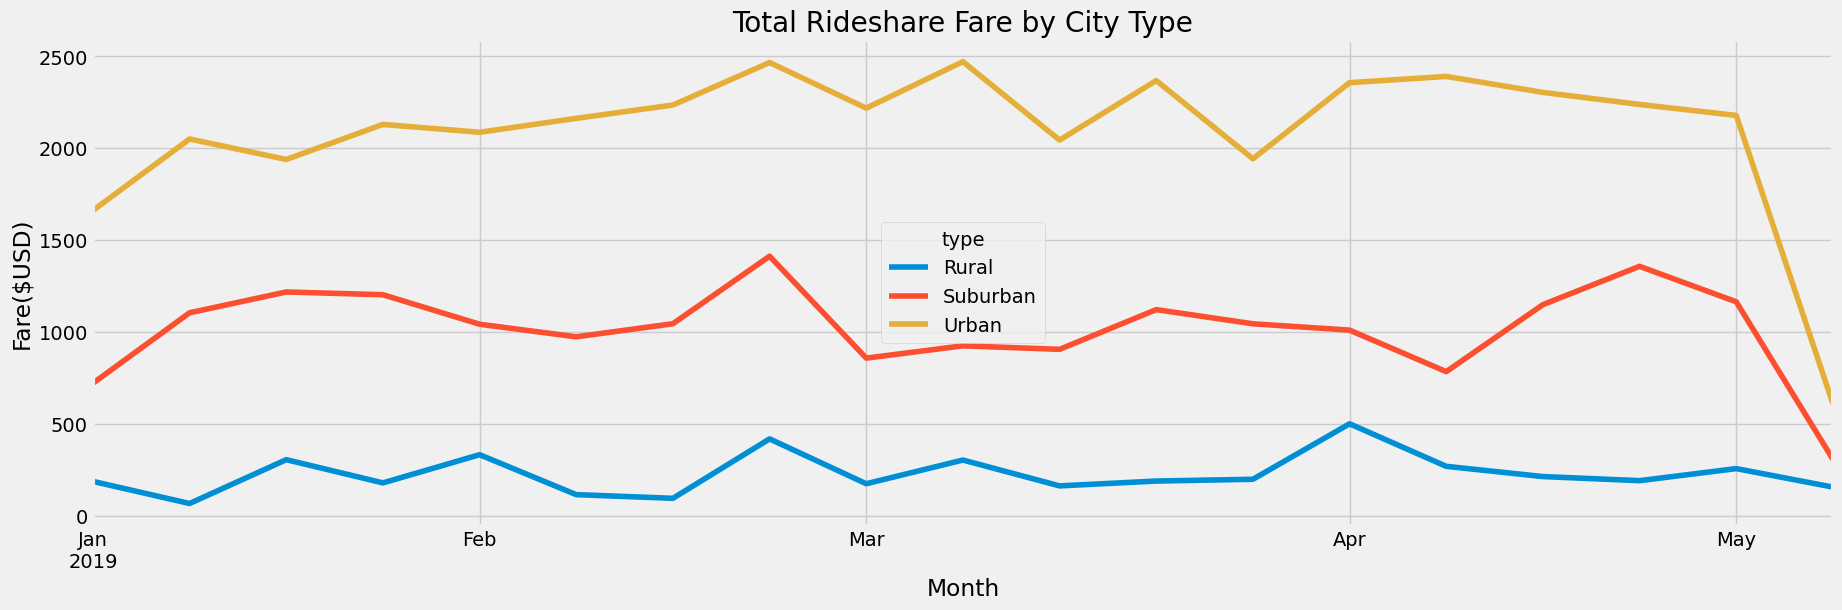

In [98]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_weeks_df.plot(figsize= (20,6))
style.use('fivethirtyeight')
plt.ylabel('Fare($USD)')
plt.xlabel('Month')
plt.title('Total Rideshare Fare by City Type')
plt.savefig("analysis/Fig8.png")
plt.show()